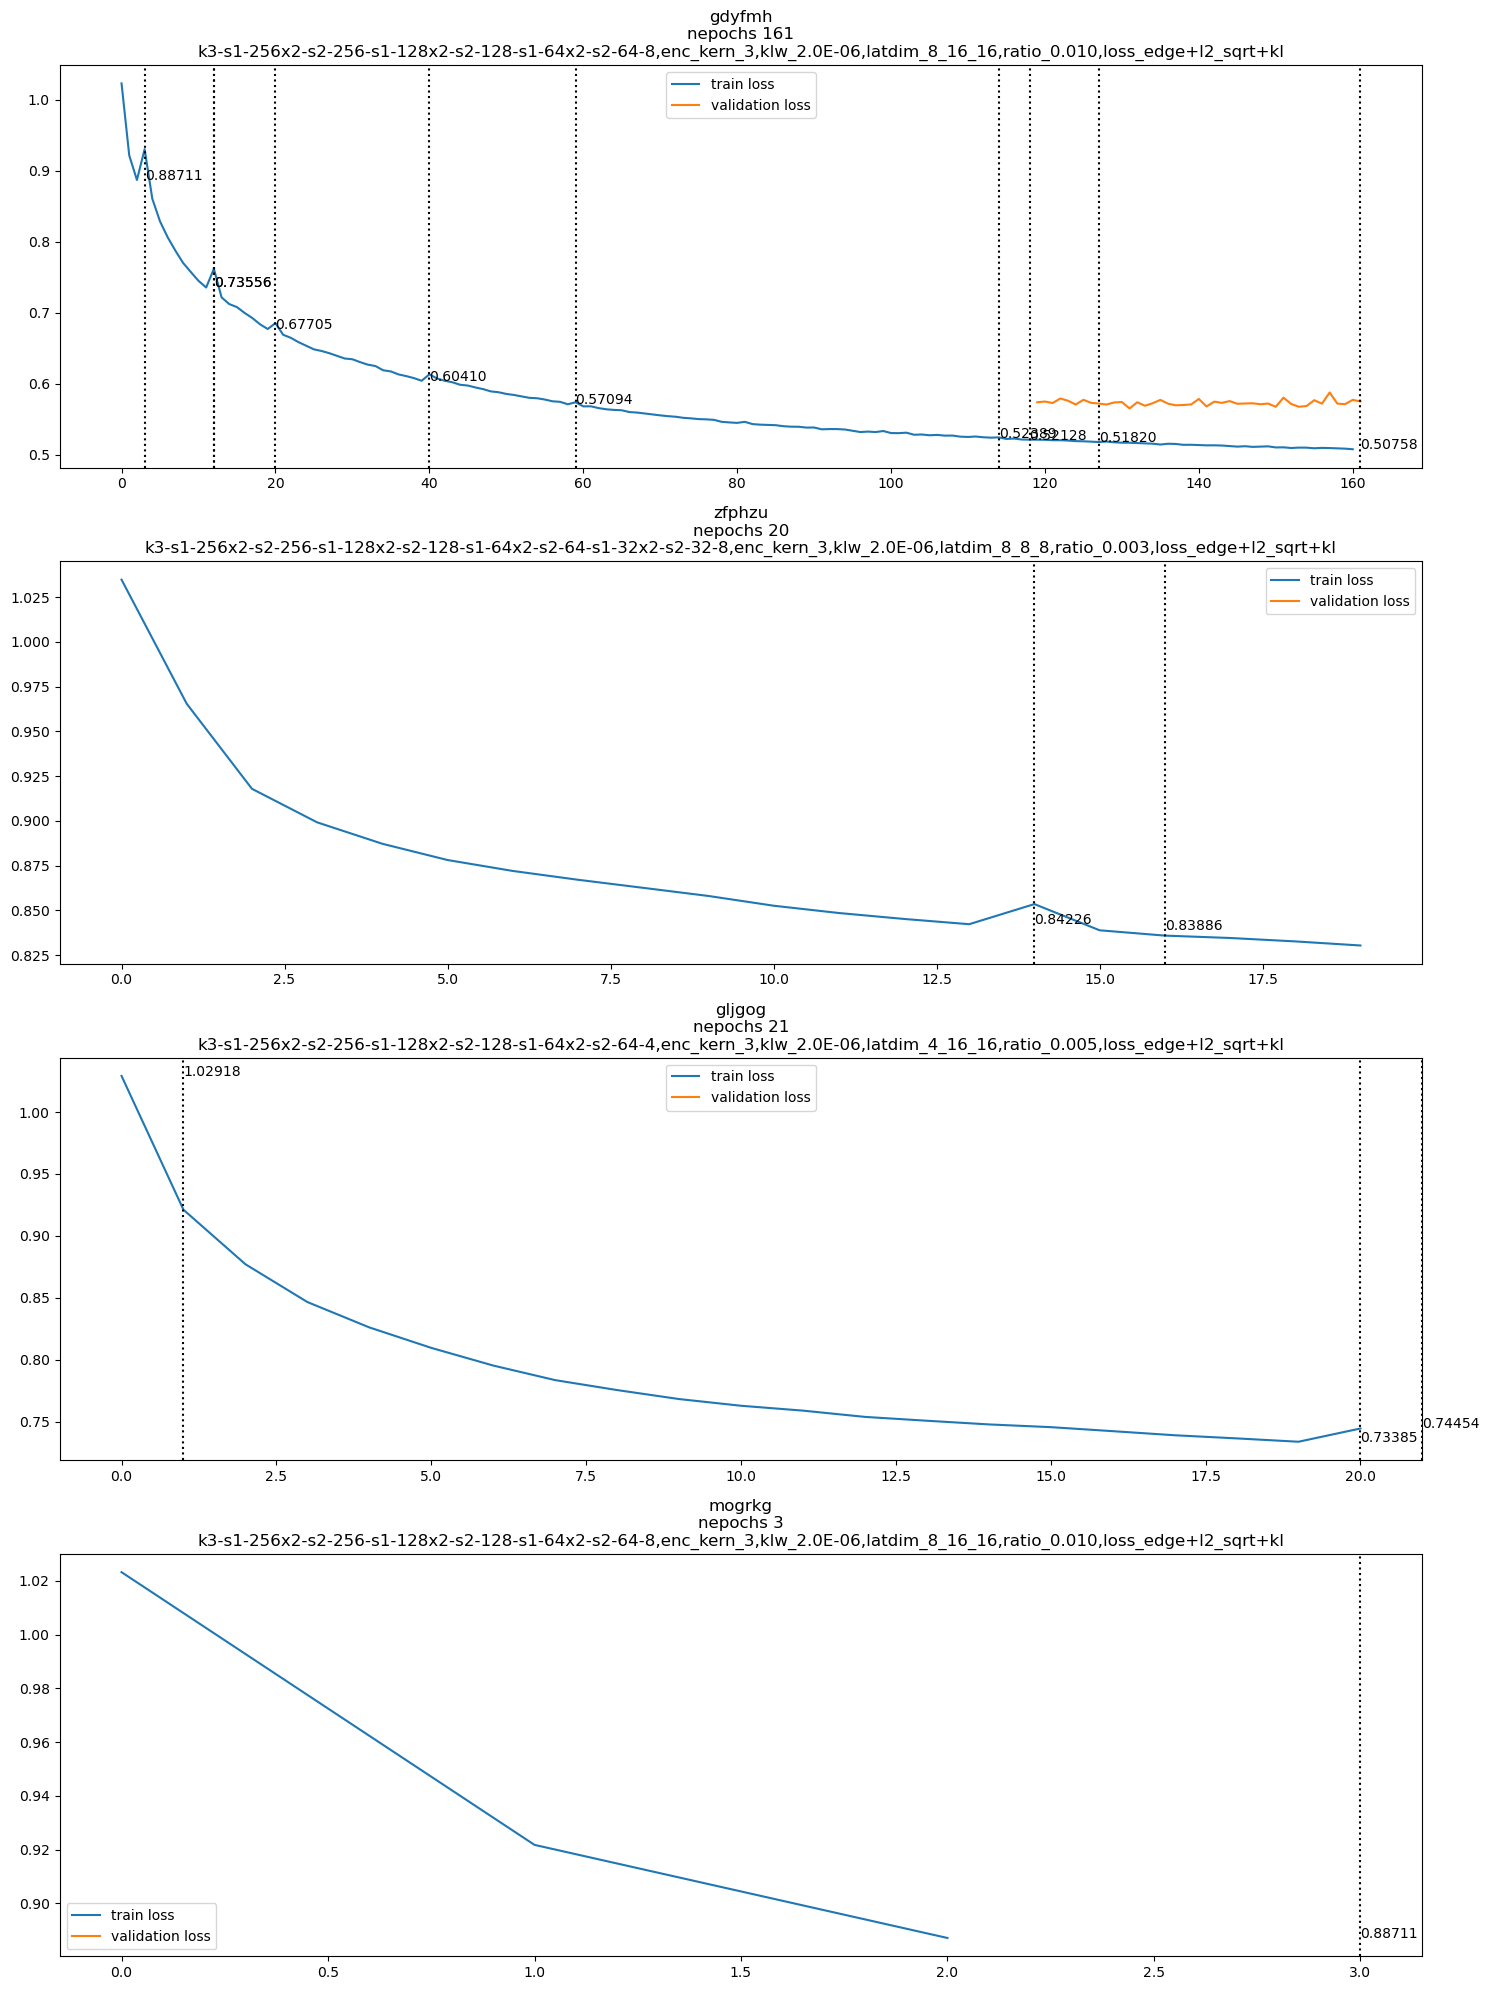

In [43]:
import sys
import matplotlib.pyplot as plt
import matplotlib.axes as axes

sys.path.append("..")
import checkpoint_util
from experiment import Experiment

def plot_one(exp: Experiment, axes: axes.Axes):

    thist = list(zip(range(len(exp.train_loss_hist)), exp.train_loss_hist))
    vhist = exp.val_loss_hist

    thist_x, thist_y = zip(*thist)
    if len(vhist):
        vhist_x, vhist_y = zip(*vhist)
    else:
        vhist_x = []
        vhist_y = []

    axes.plot(thist_x, thist_y, label='train loss')
    axes.plot(vhist_x, vhist_y, label='validation loss')
    axes.legend()
    axes.set_title(f"{exp.shortcode}\nnepochs {exp.nepochs}\n{exp.label}")

    for run in exp.runs:
        run_epochs = run.checkpoint_nepochs
        axes.axvline(run_epochs, color='black', linestyle='dotted', label='checkpoints')
        tloss = exp.train_loss_hist[run_epochs - 1]
        axes.annotate(f"{tloss:.5f}", xy=(run_epochs, tloss))

exps = checkpoint_util.list_experiments()
# exps = [exp for exp in exps if exp.shortcode == 'gdyfmh']
exps = [exp for exp in exps
        if exp.net_class == 'VarEncDec'
        and exp.net_image_size == 256
        and exp.nepochs > 0]

nrows = len(exps)
fig = plt.figure(1, figsize=(15, 5 * nrows), layout='tight')
axes_list = fig.subplots(nrows=nrows, ncols=1)
if isinstance(axes_list, axes.Axes):
    axes_list = [axes_list]

for exp, axes in zip(exps, axes_list):
    plot_one(exp, axes)


